<h2><center>ASSIGNMENT 1 -- GROUP 21</center></h2>
<h2><center>Name: DEEP JARIWALA, JUGAL KEDIA, JAITOON DHANANI</center></h2>
<h2><center>SID: 20909290, 20891429, 20875466</center></h2>
<h2><center>Problem 4</center></h2>

## Import Libraries

In [1]:
# for importing dataset 
import pandas as pd

# for Mathematics operation
import numpy as np

# matplotlib for plotting
import matplotlib.pyplot as plt 
%matplotlib inline

# for generating random numbers
import random

from acc_calc import accuracy

## Importing dataset and labels    
The training data is loaded in 'features' dataframe, while the labels are stored in 'labels'.  

In [2]:
features = pd.read_csv('train_data.csv', header = None)
labels = pd.read_csv('train_labels.csv', header = None)

## Data shuffling and Train-Validation split   
The 'dataset' is generated from the above mentioned dataframes.  
This 'dataset' dataframe is then row-wise randomly shuffled.  
A 80-20 % Train-validation split is created out of this dataset, and is represented by 'train' and 'val' dataframes.  

In [3]:
dataset = np.append(features, labels, axis = 1)
np.random.shuffle(dataset)
row, col = dataset.shape
pct = 0.20

train =  dataset[int(row*pct): ]
val = dataset[ :int(row*pct)]

## Input features (X) and target output (y) from 'train' and 'val' set.  

In [4]:
X_train = train[:,:-4]
X_val = val[:,:-4]

y_train = train[:,-4:]
y_val = val[:,-4:]

In [5]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((19804, 784), (4950, 784), (19804, 4), (4950, 4))

## Defining functions that are used during model training
<ul>
    <li>
        <b>sigmoid:</b>  Sigmoid is used as the activation function to hidden layer as it decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.
    </li>
    &nbsp;
    <li>
        <b>sigmoid_derv:</b>  The sigmoid_derv returns the derivative of Sigmoid, it is a handy function to calculate and update network weights during back propogation.     
    </li> 
    &nbsp;
    <li>
        <b>softmax:</b> Softmax ensures the sum of the outputs equal to 1. In case of our output, we would like to measure what is the probability of the input to each class. For instance, if a sample has a probability of 0.7 to be class 3, it is sensible to have 0.3 probability distributed among the other classes which is done by softmax. The final result a2 produced by the softmax is the output of our neural network.
    </li> 
    &nbsp;
    <li>
        <b>cross_entropy:</b>  This function returns the derivative for softmax / error and will be called during the backpropagation step. Cross Entropy cost function works well when dealing with Multi-class classification problem as it computes error between two probability distributions.    
    </li>
    &nbsp;
    <li>
        <b>error:</b> This function outputs the error per epoch. It is used to keep track of model performance and see how model improves/degrades with every single epoch.   
    </li>
<ul>
    

In [6]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derv(s):
    return s * (1 - s)

# for numerical stability, values are normalised
def softmax(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

def cross_entropy(pred, real):
    n_samples = real.shape[0]
    res = pred - real
    return res/n_samples

def error(pred, real):
    n_samples = real.shape[0]
    logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss

In [7]:
# Seed is set to replicate results
np.random.seed(55)

## Defining the structure of our network  
We are using Object Oriented (OOP) approach to define the structure of our network, Since we are using using ... the parameters of our model are represented as class attributes. Functions like 'feedforward' and 'backprop' that updates our parameters are represented as class methods. Some other methods are also defined inside class for data transformation, prediction and plotting.  
<ul>
    <li>
        <b> __init__ :  </b> The init method is called  when the object of our class is created. It initialize the object’s state. The important class variables are 'w1', 'b1', 'w2' and 'b2'. These are our network parameters. Or we can say weights of our model.  
    </li>
    &nbsp;
    <li>
        <b> feedforward :  </b> The feedforward method explains forward pass of data inside our neural network. At each epoch, (input x weights) + bias computes z and it is passed into the layers, which contains specific activation functions. These activation functions produces the output a.  The output of the current layer will be the input to the next layer and so on. The hidden layer contains sigmoid function as the activation function and the output layer has softmax as the activation function. The final result a2 produced by the softmax is the output of the neural network.
    </li>
    &nbsp;
    <li>
        <b> backprop :  </b> The backprop method explains backward pass of error inside our neural network. Fundamentally at each epoch, 'backprop' computes the error from the output of feed-forward and the true value. This error is back-propagated to all the weight matrices through computing gradients in each layer and these weights are updated so as to minimize the training error.
    </li>
     &nbsp;
    <li>
        <b> one_hot :  </b> The one_hot method is a helper method that accepts  probability distributed output produced by feedforward method and returns its one-hot encodings. For example, class 0 outputed as [0.89, 0.08, 0.01, 0.02] will be labeled as [1, 0, 0, 0] and class 3 outputed as [0.01, 0.11, 0.33, 0.55] will be labeled as [0, 0, 0, 1].   
    </li>
    &nbsp;
    <li>
        <b> one_hot :  </b> The one_hot method is a helper method that accepts an array of probability distributed output produced by feedforward method and returns its one-hot encodings. For example, class 0 outputed as [0.89, 0.08, 0.01, 0.02] will be labeled as [1, 0, 0, 0] and class 3 outputed as [0.01, 0.11, 0.33, 0.55] will be labeled as [0, 0, 0, 1].   
    </li>
    &nbsp;
    <li>
        <b> predict :  </b> The predict method is used to predict labels of unseen data in one-hot format.  
    </li>
     &nbsp;
    <li>
        <b> parameters :  </b> The parameters method is used to return dictionary of model parameters (network weights). It helps properly store model parameters onto disk for later use.
    </li>
    &nbsp;
    <li>
        <b> plot_accuracy_curve :  </b> As the name suggests, the plot_accuracy_curve method is used to generate training accuracy curve. 
    </li> 
    &nbsp;
    <li>
        <b> plot_loss_curve :  </b> Similar to plot_accuracy_curve, the plot_loss_curve method is used to generate training loss curve.   
    </li>
    
</ul>


In [8]:
class MLP:
 
    def __init__(self, neurons, x, y, lr):
        
        self.x = x
        self.y = y
        self.lr = lr
        
        # The 'ip_dim' is the number of nodes/neurons at input layer 
        # (it's 784 in our case). 
        ip_dim = x.shape[1]
        
        # The 'op_dim' is the number of nodes/neurons at output layer 
        # (it's 4 in our case).
        op_dim = y.shape[1]

        
        # INITIALISATION OF WEIGHTS AND BIASES
        
        # The Weights are initialized using Xavier Initialisation technique 
        # to prevent the problem of vanishing and exploding gradients, 
        # while the Biases are Zero Initialised.
        
        
        # 'w1' => to keep track of weights at 1st layer (i.e hidden layer)
        # Shape of 'w1' => ( 784 x no_of_hidden_layer_neurons )
        self.w1 = np.random.randn(ip_dim, neurons) * np.sqrt(2/(ip_dim + neurons))
        
        # 'b2' => to keep track of bias at 1st layer (i.e hidden layer)
        # Shape of 'b1' => ( 1 x no_of_hidden_layer_neurons )
        self.b1 = np.zeros((1, neurons))
        
        # 'w2' => to keep track of weights at 2nd layer (i.e output layer)
        # Shape of 'b1' => ( no_of_hidden_layer_neurons x 4 )
        self.w2 = np.random.randn(neurons, op_dim) * np.sqrt(2/(neurons + op_dim))
        
        # 'b2' => to keep track of bias at 2nd layer (i.e output layer)
        # Shape of 'b2' => ( 1 x 4 )
        self.b2 = np.zeros((1, op_dim))
        
        # The 'accuracy_tracker' and 'loss_tracker' keeps track of  Training accuracy 
        # and traing loss at each epoch. 'epoch' is a counter that is initialized to 0 
        # and incremented at each forward pass.
        self.accuracy_tracker = [None]
        self.loss_tracker = [None]
        self.epoch = 0

        
    # FORWARD PROPOGATION: The feedforward step does matrix dot product calculation and
    # generates a prediction. 
    
    def feedforward(self):
        
        self.epoch += 1
       
        z1 = np.dot(self.x, self.w1) + self.b1
        self.a1 = sigmoid(z1)
        
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = softmax(z2)

        self.predictions = self.one_hot(self.a2)
        
        acc = accuracy(self.y, self.predictions)
        self.accuracy_tracker = self.accuracy_tracker + [acc*100]
        
        if self.epoch %10 == 0:
            print("Epoch:", self.epoch)
            print("Training accuracy: ", acc*100)
        
    # The backprop step calculates the error from the feedforward prediction and makes 
    # small adjustments to the weights.
    
    def backprop(self):
        
        loss = error(self.a2, self.y)
        
        a2_delta = cross_entropy(self.a2, self.y) # w2
        z1_delta = np.dot(a2_delta, self.w2.T)
        a1_delta = z1_delta * sigmoid_derv(self.a1) # w1
        
        self.w2 -= self.lr * np.dot(self.a1.T, a2_delta)
        self.b2 -= self.lr * np.sum(a2_delta, axis=0, keepdims=True)
        self.w1 -= self.lr * np.dot(self.x.T, a1_delta)
        self.b1 -= self.lr * np.sum(a1_delta, axis=0)
        self.loss_tracker = self.loss_tracker + [loss]
        
        if self.epoch %10 == 0:
            print('Training Error:', loss, '\n')

    def one_hot(self, data):
        self.q = data.argmax(axis=-1)
        self.my_list = list()
        for i in self.q:
            t = [0,0,0,0]
            t[i] = 1
            self.my_list.append(t)
            
        return (np.array(self.my_list))
    
    def predict(self, data):
        self.x = data
        z1 = np.dot(self.x, self.w1) + self.b1
        self.a1 = sigmoid(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = softmax(z2)
        return (self.one_hot(self.a2))

    def parameters(self):
        self.param = {
            'w1': self.w1,
            'w2': self.w2,
            'b1': self.b1,
            'b2': self.b2,
        }
        return (self.param)
             
    def plot_accuracy_curve(self):
        import matplotlib.pyplot as plt
        plt.figure(figsize=(8, 6))
        plt.plot(self.accuracy_tracker)
        plt.grid()
        plt.title("Training Accuracy Vs. Epoch")
        plt.xlabel('Epochs')
        plt.ylabel('Training Accuracy')
        plt.show()
        
    def plot_loss_curve(self):
        import matplotlib.pyplot as plt
        plt.figure(figsize=(8, 6))
        plt.plot(self.loss_tracker)
        plt.grid()
        plt.title("Training Loss Vs. Epoch")
        plt.xlabel('Epochs')
        plt.ylabel('Training Loss')
        plt.show()


## Model Initialization
The model is initialized by creating the 'model' object of MLP class which calls the constructor (__init__) method. Here we are going to use 64 neurons at hidden layer and will pass the trainset data along with labels. w'll set the learning rate to 0.5.

In [9]:
model = MLP(neurons = 32, x = X_train, y = y_train, lr = 0.5)

## Training the model
The model is trained for 100 epochs. The actual training is implemented with a *for* loop that calls feedforward() and backprop() methods for every epoch. 

In [10]:
epochs = 100
for x in range(epochs):
    model.feedforward()
    model.backprop()

Epoch: 10
Training accuracy:  92.0420117148051
Training Error: 0.6266253142550882 

Epoch: 20
Training accuracy:  93.77903453847708
Training Error: 0.36350207244058136 

Epoch: 30
Training accuracy:  94.5061603716421
Training Error: 0.2685433998540002 

Epoch: 40
Training accuracy:  94.92021813774994
Training Error: 0.22224281808287621 

Epoch: 50
Training accuracy:  95.27873156937993
Training Error: 0.19500021245451618 

Epoch: 60
Training accuracy:  95.49585942233892
Training Error: 0.1769991911117481 

Epoch: 70
Training accuracy:  95.70288830539285
Training Error: 0.16415301465261586 

Epoch: 80
Training accuracy:  95.84427388406382
Training Error: 0.15447272866809963 

Epoch: 90
Training accuracy:  95.9856594627348
Training Error: 0.14687733570985329 

Epoch: 100
Training accuracy:  96.1169460715007
Training Error: 0.14072937083971426 



## Extracting trained Model parameters
The parameters() method is called to receive trained parameters into 'params' variable. This variable is then stored onto disk with Numpys .save() method.

In [11]:
params = model.parameters()
np.save('mlp_params.npy', params)

## Final Training Accuracy

In [12]:
# Training Accuracy
print("Training accuracy   : ", accuracy(y_train, model.predict(X_train))*100)

Training accuracy   :  96.12704504140578


## Performance on Unseen Data
The validation set is used to measure the performance of our model. Accuracy is used as performance matrix. 

In [13]:
# Validation Accuracy
print("Validation accuracy : ", accuracy(y_val, model.predict(X_val))*100)

Validation accuracy :  95.79797979797979


Since Both (training and validation) accuracies are High it is clear that the model is not underfitting. Also the validation accuracy on unseen data is quite close to the training accuracy of the model so we can say that the model is not overfitting the data and it has properly converged to the global minimum.

## Training Accuracy vs. Epoch graph


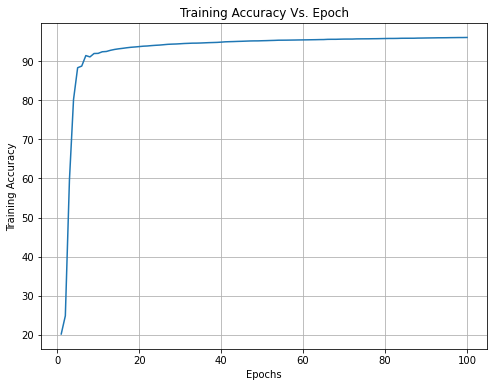

In [14]:
model.plot_accuracy_curve()

From the above accuracy curve, it is visible that the model accuracy improves with every epoch and platues after around 20 epochs. Thus we can say that the model did not get converge at any local minima and followes ideal training path.


## Training Loss vs. Epoch graph


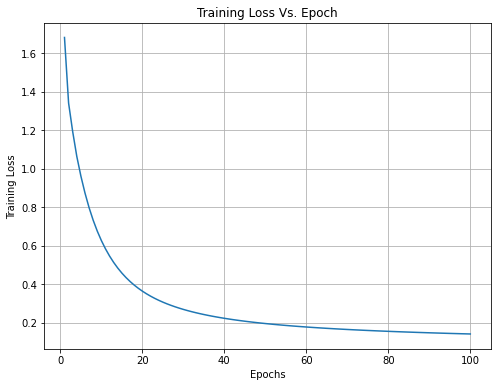

In [15]:
model.plot_loss_curve()

The above training error curve is ideal. The model converges between 20-40 epochs and approaches to a constant loss of 0.14.